In [1]:
import os, sys
from dotenv import find_dotenv, load_dotenv
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

load_dotenv(find_dotenv())
path_root = os.environ.get('PATH_ROOT')
df = pd.read_csv('{0}/data/raw/CYS-prediction-data.csv'.format(path_root))

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

In [2]:
df = pd.read_csv('{0}/data/raw/CYS-prediction-data.csv'.format(path_root))
df.tail(10)

,Date,DGS10,DGS5,FF,SP500,USD1WKD156N,USD3MTD156N,label
14966,2017-11-14,2.38,2.06,NaN,2578.87,1.20406,1.41899,8.03
14967,2017-11-15,2.33,2.04,1.16,2564.62,1.20356,1.42190,7.97
14968,2017-11-16,2.37,2.07,NaN,2585.64,1.20372,1.43567,7.98
14969,2017-11-17,2.35,2.06,NaN,2578.85,1.20267,1.44067,8.05
14970,2017-11-20,2.37,2.09,NaN,2582.14,1.20367,1.44594,8.15
14971,2017-11-21,2.36,2.11,NaN,2599.03,NaN,NaN,8.24
14972,2017-11-22,2.32,2.05,1.16,2597.08,NaN,NaN,8.33
14973,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14974,2017-11-24,2.34,2.07,NaN,2602.42,NaN,NaN,8.25
14975,2017-11-27,NaN,NaN,NaN,2601.42,NaN,NaN,8.25


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.tail(10)

,DGS10,DGS5,FF,SP500,USD1WKD156N,USD3MTD156N,label
Date,,,,,,,
2017-11-14,2.38,2.06,NaN,2578.87,1.20406,1.41899,8.03
2017-11-15,2.33,2.04,1.16,2564.62,1.20356,1.42190,7.97
2017-11-16,2.37,2.07,NaN,2585.64,1.20372,1.43567,7.98
2017-11-17,2.35,2.06,NaN,2578.85,1.20267,1.44067,8.05
2017-11-20,2.37,2.09,NaN,2582.14,1.20367,1.44594,8.15
2017-11-21,2.36,2.11,NaN,2599.03,NaN,NaN,8.24
2017-11-22,2.32,2.05,1.16,2597.08,NaN,NaN,8.33
2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-24,2.34,2.07,NaN,2602.42,NaN,NaN,8.25


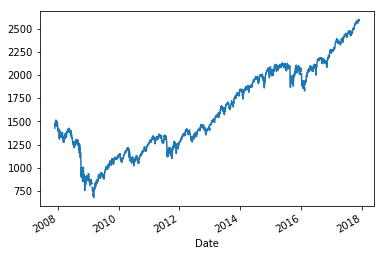

In [4]:
df['SP500'].plot()

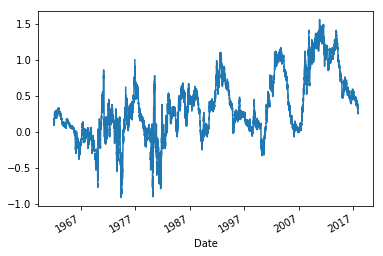

In [5]:
from features.build_features import spread

df = spread(df,'DGS10', 'DGS5')
df['DGS10-DGS5'].plot()


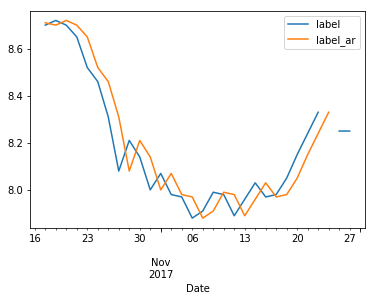

In [6]:
from features.build_features import add_autoregressive

df = add_autoregressive(df, 'label')
df[['label', 'label_ar']][-30:].plot()

In [7]:
df['FF'] = df['FF'].interpolate(method='polynomial', order=3)
df = df.dropna()
df.tail(10)

,DGS10,DGS5,FF,SP500,USD1WKD156N,USD3MTD156N,label,DGS10-DGS5,label_ar
Date,,,,,,,,,
2017-11-07,2.32,1.99,1.158510,2590.64,1.20550,1.40258,7.91,0.33,7.88
2017-11-08,2.32,2.01,1.160000,2594.38,1.20500,1.40981,7.99,0.31,7.91
2017-11-09,2.33,2.01,1.161000,2584.62,1.20272,1.41289,7.98,0.32,7.99
2017-11-10,2.40,2.06,1.161538,2582.30,1.20422,1.41289,7.89,0.34,7.98
2017-11-13,2.40,2.08,1.161154,2584.84,1.20350,1.41586,7.96,0.32,7.89
2017-11-14,2.38,2.06,1.160615,2578.87,1.20406,1.41899,8.03,0.32,7.96
2017-11-15,2.33,2.04,1.160000,2564.62,1.20356,1.42190,7.97,0.29,8.03
2017-11-16,2.37,2.07,1.159385,2585.64,1.20372,1.43567,7.98,0.30,7.97
2017-11-17,2.35,2.06,1.158846,2578.85,1.20267,1.44067,8.05,0.29,7.98


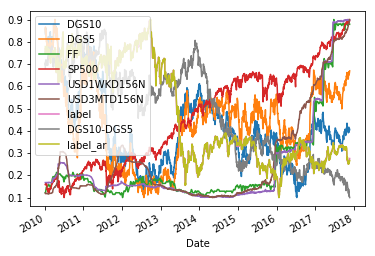

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0.1,0.9))

df[df.columns] = scaler.fit_transform(df[df.columns])
df.plot()